# 6 Data Pre-Processing – Principal Component Analysis

**Note:** In the discussion below, recall that a **sample** is an individual spectrum (a column in a DataFrame), and a **feature** is a particular wavenumber (a row in a DataFrame). Each sample has many features associated with it.

Principal component analysis is a process that reduces the dimensionality of a dataset. This is achieved by reducing the number of features associated with all samples *via* a mathematical transformation.
<br>
<br>Dimensional reduction can speed the use of algorithms by only handing key data for processing and reducing computation. It also has the advantage of allowing data visualisation (plotting 100-dimensional data is much harder than 2-dimensional or 3-dimensional data).
<br>
<br>Principal component analysis transforms data into a new coordinate system so that each axis represents a direction in the dataspace with the most significant amount of variation, i.e. the best directions to look when trying to tell apart different samples.

Consider the following arbitrary dataset comprised of two discernable subsets:
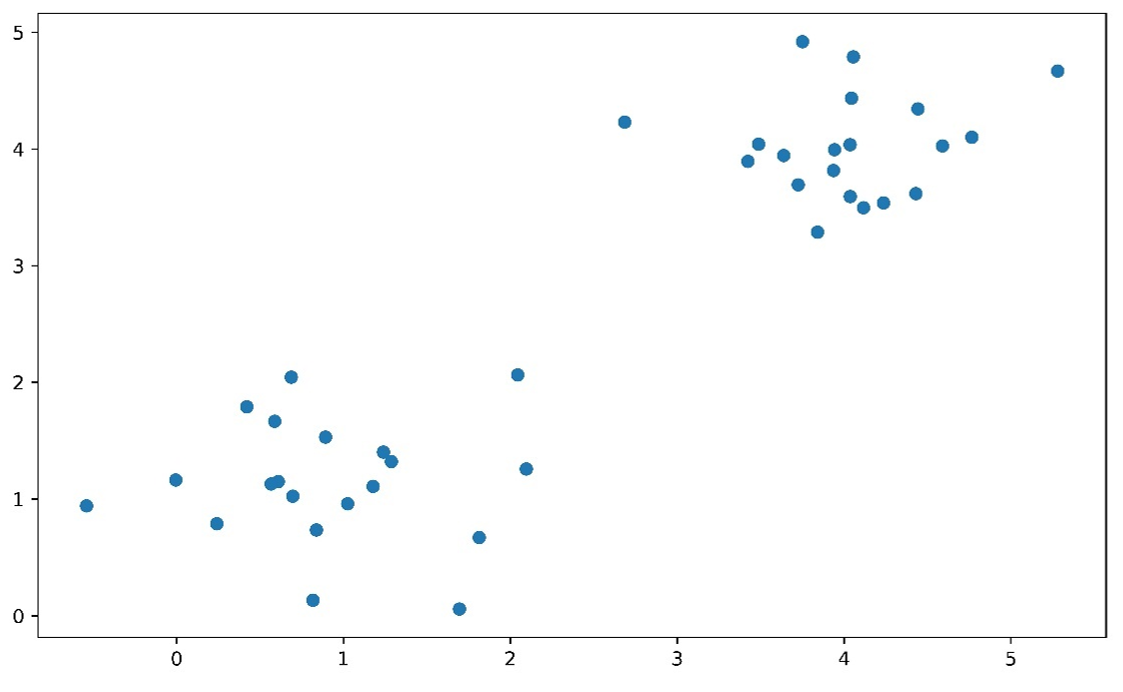
<br>There is a good deal of variation in both x and y, but there is even more variation along a hybrid axis - the line of best fit:
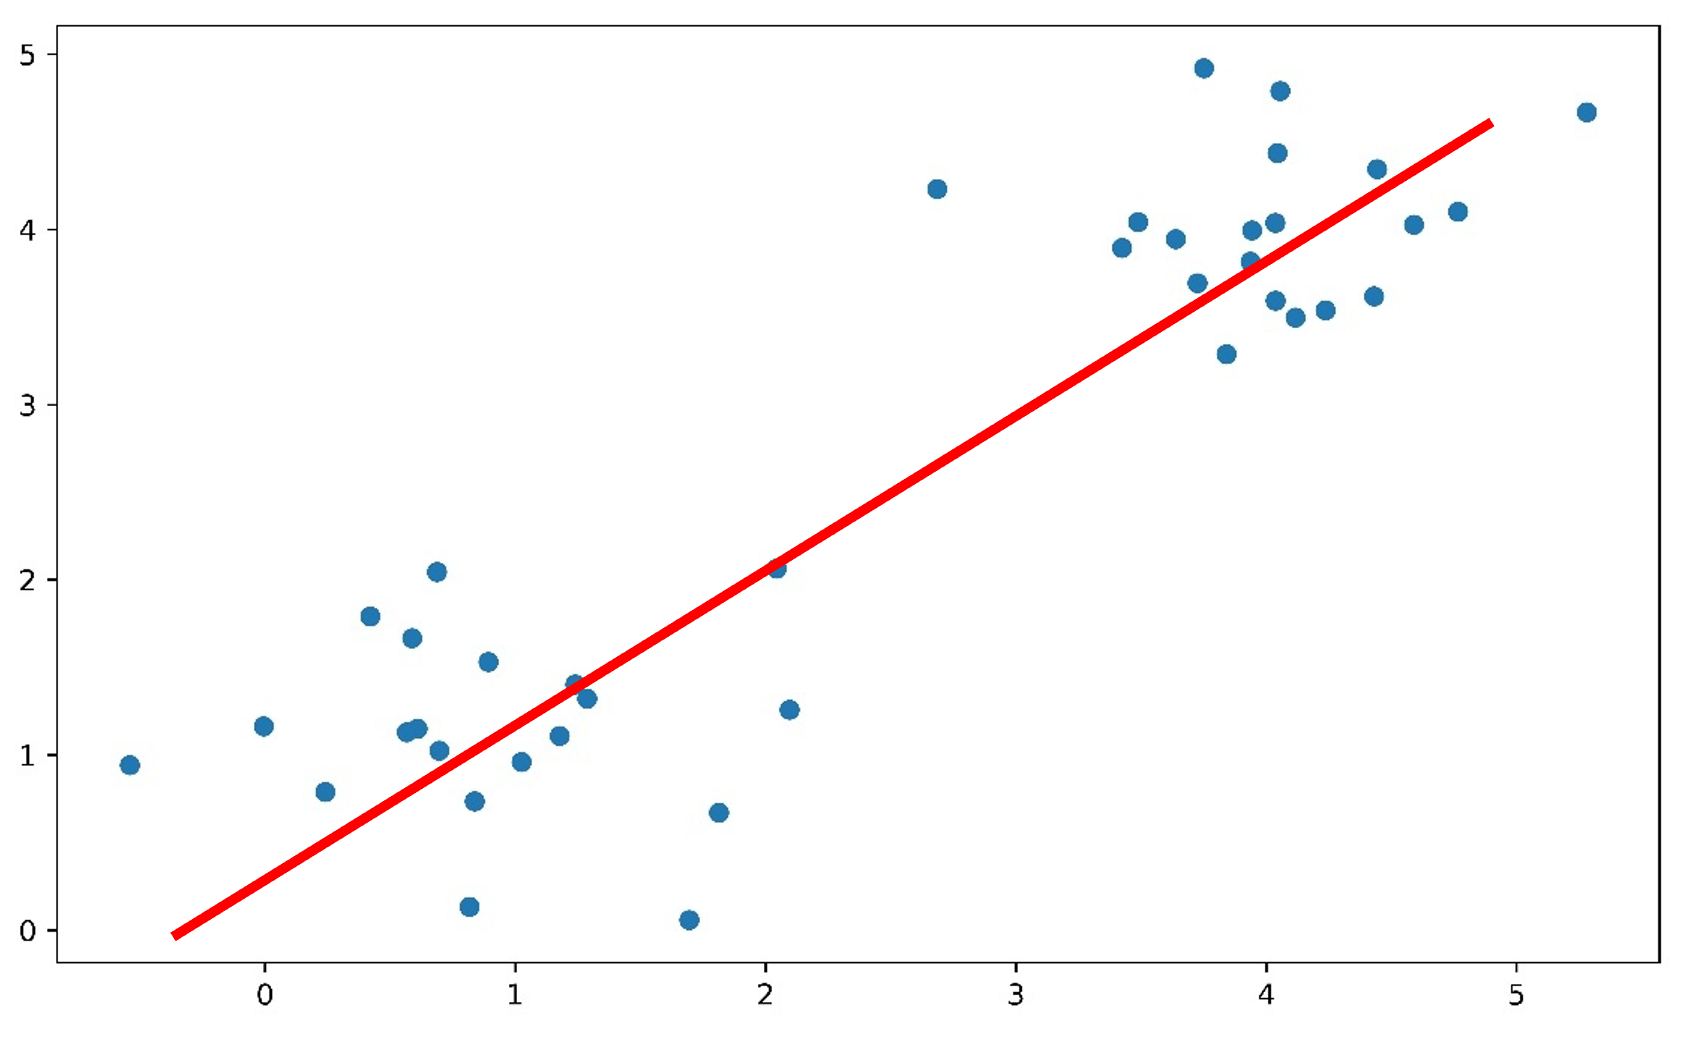
<br>We can add a second perpendicular axis that captures the second-most important direction of data variation as well:
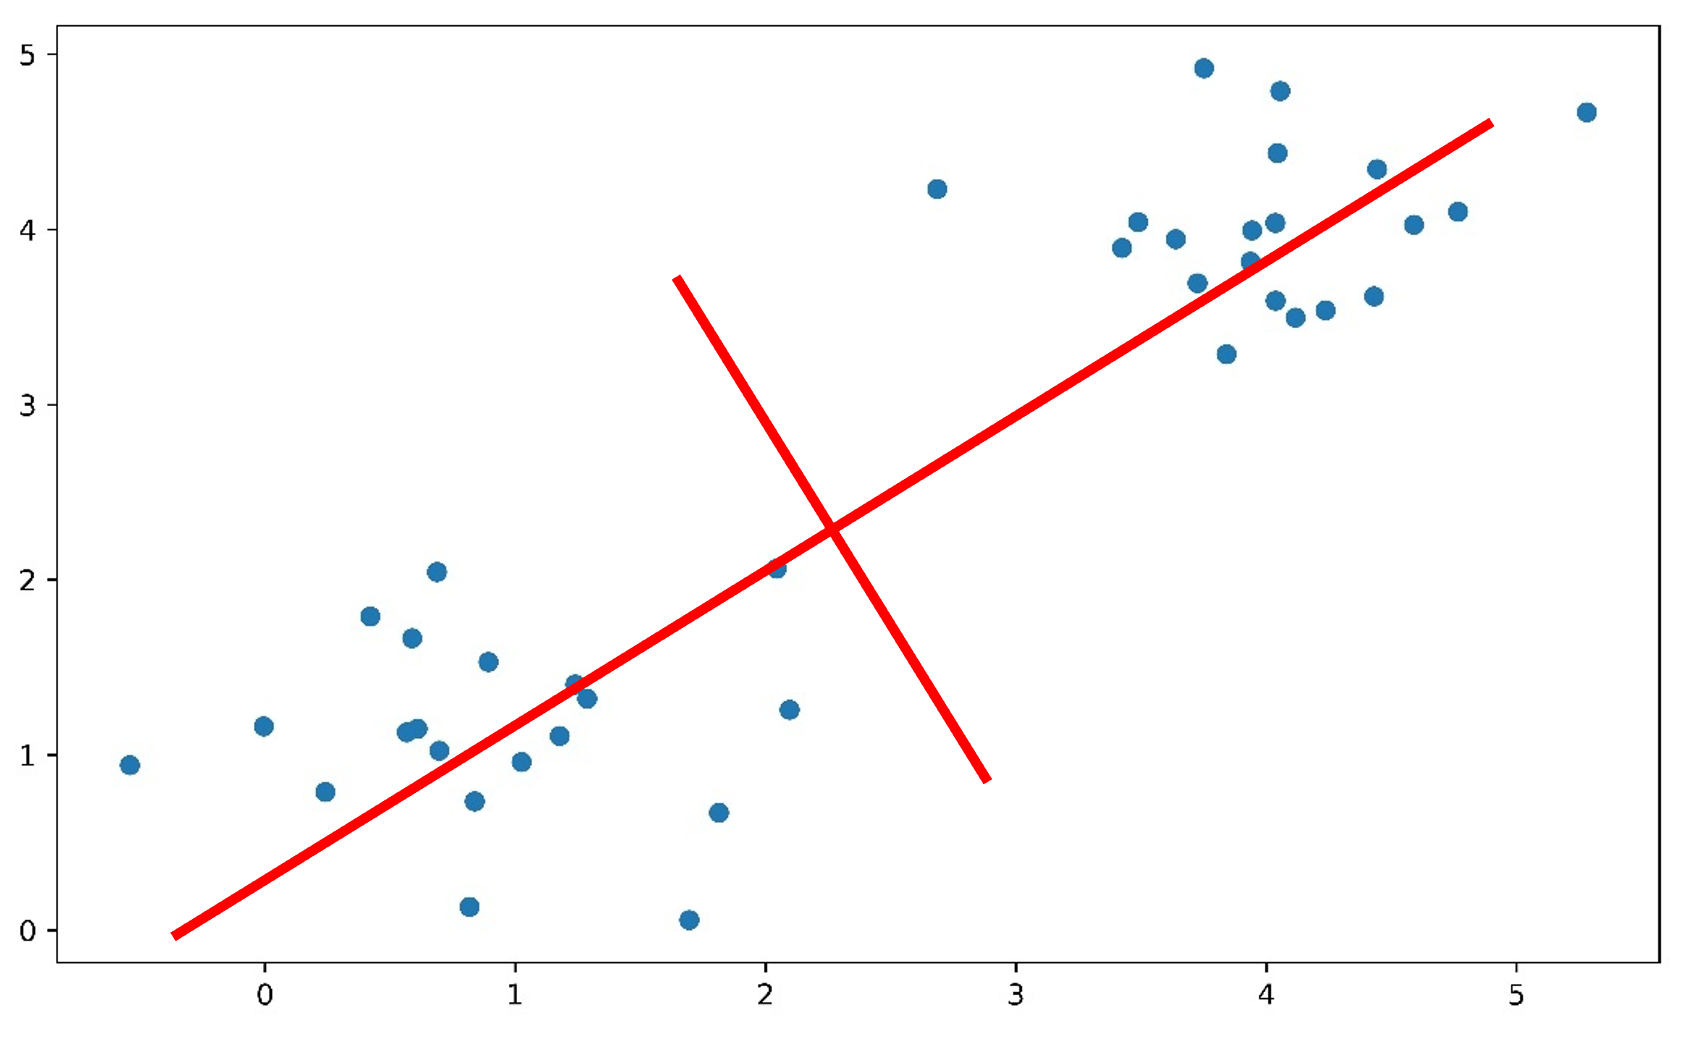

Redrawing these new axes gives the following new projection of the data:
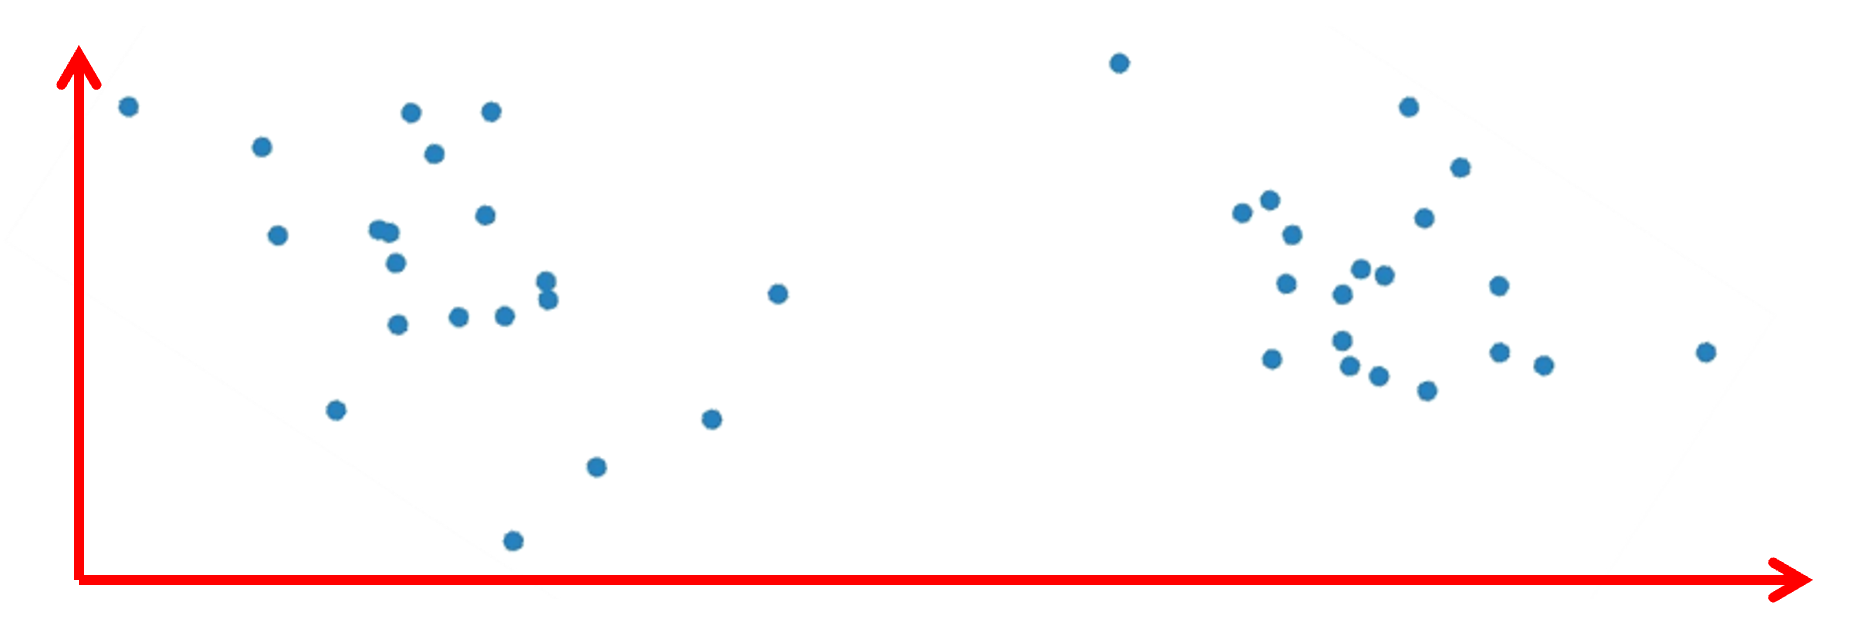
Notice that in this new projection removal of the second (new y) axis still allows the two data subsets to be distinguished, i.e. by capturing the directions of most variation we plot fewer axes and still tell different subsets apart:
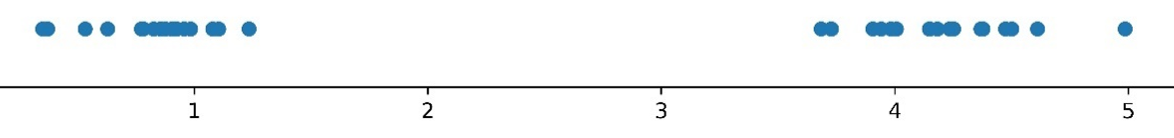
Consider how removal of the x axis in the new projection would not allow the two subsets to be distinguished since the new y axis captures less of the variation within the dataset.

**Extension - Mathematical Outline**
<br>
<br>The data is in an f × s matrix, with features (e.g. transmittances) as columns and samples (e.g. repeats/IR spectra) as rows.
<br>
<br>We seek a set of n lots of n-dimensional vectors (e.g. 3 lots of 3-dimensional vectors). Each vector has the form w=(w_1,…,w_n ). There are p such vectors: w_1,…,w_n. These vectors will be the new set of axes.
<br>
<br>Each original sample, s, is projected onto the vectors w (*via* s.w) in order to transform it into its new (principal component) coordinate system, giving a new transformed sample, t.
<br>
<br>How are the w vectors found? The vector w_1 is defined such that it is a line of best fit through the data; in other words, it is the vector along which there is the **maximum** variance in the dataset.
<br>
<br>The remaining p-1 vectors in w are constructed such that w forms an orthogonal set. A consequence of how we defined w_1 for the coordinate transform is that in our new coordinates, the first coordinate is the coordinate along which the variation, or spread, of the data is maximised. No other coordinate system would give such a big spread along any one axis. Similarly, w_2 is the axis along which the second most variance/spread can be put.
<br>
<br>As a result, the final coordinates, …,w_(n-2),w_(n-1),w_n, are the coordinates along which the data is the least spread/varied. Since there is such little variation along these axes (they account for very little of the variation/spread of the dataset), we can often safely get rid of them, i.e. reduce the dimensionality of the transformed dataset.

**Note:** Running this code will prevent some irrelevant errors popping up later on in the exercise.

In [1]:
import warnings
warnings.filterwarnings("ignore")

### 1 Principle Component Analysis (PCA) - 3 Dimensions

✏️ To begin with, import the `numpy`and `pandas` libraries, as well as your ***C317*** library.

In [5]:
import numpy as np
import pandas as pd
import C317

✏️ As in the previous notebook, use your `C317` library to load in a DataFrame containing all of the pre-processed IR spectra.

In [6]:
C317.load_spectra()

TypeError: load_spectra() missing 1 required positional argument: 'n'

✏️ How many rows/wavenumbers does your DataFrame currently have?

In [4]:
#251x300

The `sklearn.decomposition` library contains a function `PCA()` which takes as an argument the number of principle components you want your data reduced to and generates a `PCA` object. (This is very similar to creating an array object using `numpy`, e.g. `numpy.array([x, ,y, x])`).
<br>
<br>The `PCA` object contains a method, `fit_transform()`, which takes data into the object, applies PCA, and returns the data as a `numpy` array.
<br>
<br>**Note:**
>PCA() is fussy and requires input to be formatted so that each sample is a different **row** in a DataFrame. This is currently not the format of the data that you have imported. Consider making use of the DataFrame attribute described here:
>
>https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.T.html
>
>The output is also formatted so that each row corresponds to a separate sample. 

The `numpy` array can then be transformed back into a DataFrame, swapping rows for columns and assigning the correct column headings as you have done in previous notebooks.
<br>
<br>**Note:**
>PCA transformation strips the column/row headings from the data handed to `fit_transform()`. So this information will not appear in the output. You will need to provide the column headings again when importing your reduced dataset back into a DataFrame. 

✏️ Import the `sklearn.decomposition` library and create a new `PCA` object, with 3 principal components.

In [ ]:
import sklearn.decomposition
PCA=sklearn.decomposition.PCA(3)

✏️ Use the `fit_transform()` method of your `PCA` object to transform your input data into a reduced number of components. Remember to transform your DataFrame into the correct arrangement before handing it to `fit_transform()`. What are the dimensions of your PCA transformed data output by the `fit_transform()` method?

In [30]:
x=PCA.fit_transform(C317.load_spectra().T)
PCA.fit_transform(C317.load_spectra().T).shape
x.T

array([[-1.53209910e-05, -1.45074355e-05,  5.17798586e-05,
        -1.03319877e-05, -1.16194444e-05],
       [ 1.23079804e-05,  4.29633108e-06,  1.11538107e-06,
        -9.90173310e-06, -7.81795946e-06],
       [ 5.18053614e-06, -7.02748557e-06, -1.87740788e-07,
         8.37567197e-06, -6.34098175e-06]])

✏️ Convert the reduce data array back into a DataFrame in the correct orientiation (each sample as a different column) and making sure each column has an appropriate header.

In [ ]:
df=pd.DataFrame(data=x.T, columns=C317.load_spectra().columns)
df

,m-anisaldehyde_1,m-anisaldehyde_2,m-anisaldehyde_3,m-anisaldehyde_4,m-anisaldehyde_5
0,-0.000015,-0.000015,5.177986e-05,-0.000010,-0.000012
1,0.000012,0.000004,1.115381e-06,-0.000010,-0.000008
2,0.000005,-0.000007,-1.877408e-07,0.000008,-0.000006


Where previously the DataFrame contained hundreds of rows, each corresponding to a different wavenumber, you should now have a DataFrame with ~380 columns, and only 3 rows, i.e. the dimensions of the dataset have ben reduced to the 3 most significant components.
<br>
<br>

Now that we have our data down from hundreds of dimensions to 3 dimensions, we can plot the three principal components of each spectrum on a 3D graph. (Refer back to Notebook 2 if you cannot recall how to construct graphs in three dimensions.)

✏️ By following the steps you worked through in Notebook 2, import the relevant libraries and produce a 3D scatter plot of the three principal components contained in rows 0, 1, and 2 of your DataFrame. Add labels so that it is clear which component is plotted on which axis.
<br>
<br>*Hint:* It will be useful to recall how to extract a specific row of a DataFrame.

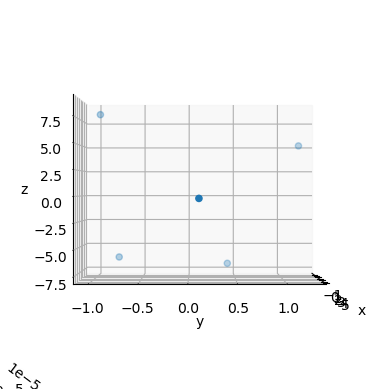

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

figure1=plt.figure()
axes1=figure1.add_subplot(projection="3d")
axes1.scatter(df.iloc[0],df.iloc[1],df.iloc[2],marker="o")
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_zlabel('z')
lst=[0,0,10]#cross section of yz
axes1.azim=lst[0]
axes1.elev=lst[1]
axes1.dist=lst[2]
plt.show()


While the principal components are now displayed, it is not currently possible to distinguish the three different subsets of data within the plot, i.e. *ortho*, *meta*, and *para* compounds. This can be accomplished by assigning a colour to each subset.
<br>
<br>As outlined in Notebook 2, each datapoint can be assigned its own colour by handing the `c` (colors) argument a list of colour names as strings.
<br>
<br>As you will see from the headings in your DataFrame, the .txt files that you have been provided with are titled with the substitution pattern as their first character (o, m, or p). The following steps will outline one method that could be employed to create a list of colours based on the titles of each .txt file:
>Create a list containing the heading of each column of the DataFrame
>
>While iterating through the list of headings, employ an `if`-`else` type statement to assign a particular colour based on the first character of each string in the list. *Hint:* Recall that strings can be treated as lists, i.e. `string[1]` will return the second character in a string.

✏️ Using the method outlined above, generate a list of colours assigning a separate colour to each data point depending on whether it is *ortho*-, *meta*-, or *para*- substituted.
<br>
<br>**Note:** Typical combinations of colours include Red/Green/Blue, Cyan/Magenta/Yellow, and Black/Grey/Light Grey. 

In [36]:
colors=[] #red ortho, green meta, blue para
for name in df.columns:
    if name[0]=='o':
        colors.append('red')
    elif name[0]=='m':
        colors.append('green')
    else:
        colors.append('blue')
print(colors)

['green', 'green', 'green', 'green', 'green']


✏️ Plot your principal component data again, this time using your colour list to identify the subsets of data. Find a viewing angle that you think shows the best separation of the three subsets in the dataspace.
<br>
<br>Which of the subsets are best separated by this analysis? Is this, in your view, a logical result?

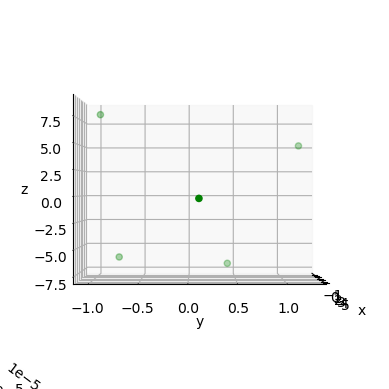

In [37]:

figure1=plt.figure()
axes1=figure1.add_subplot(projection="3d")
axes1.scatter(df.iloc[0],df.iloc[1],df.iloc[2],marker="o",c=colors)
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_zlabel('z')
lst=[0,0,10]#cross section of yz
axes1.azim=lst[0]
axes1.elev=lst[1]
axes1.dist=lst[2]
plt.show()


---
### 2 Principle Component Analysis (PCA) - More Than 3 Dimensions

Reducing the dimensions of a dataset from hundreds of rows/features to just 3 can be very useful for visualisation, as illustrated above. However, it is often not the case that subsets of data can be separated using only a three principal component dataspace (above you saw that two subsets were much more well separated than the third).
<br>
<br> Reducing the dimensions of a dataset has the further advantage of limiting the extent of computation that needs to be carried out during analysis - consider how reducing 251 wavenumber entries per spectrum to 20 components per spectrum could stand to extensively decrease calculation times.
<br>
<br> So there is often a middle ground in data reduction *via* principal component analysis, not reducing the data so much that subsets cannot be distinguished, but enough to ease computational burden.

✏️ By following the method you employed above, create a new DataFrame and perform PCA on the data, this time using 20 principal components.

In [3]:
PCA=sklearn.decomposition.PCA(5)
x=PCA.fit_transform(C317.load_spectra().T)
df=pd.DataFrame(data=x.T, columns=C317.load_spectra().columns)
df

NameError: name 'sklearn' is not defined

✏️ The principal components identified for a dataset are independent of the number of dimensions specified. i.e. Calculating 20 principal components should still give the same results for components 1, 2, and 3.
<br>
<br>
With this in mind, produce a plot of the first three principal components of your 20 component reduced dataset using the exact same display parameters to confirm that the 20 component analysis has been performed in the same way as the 3 component. 

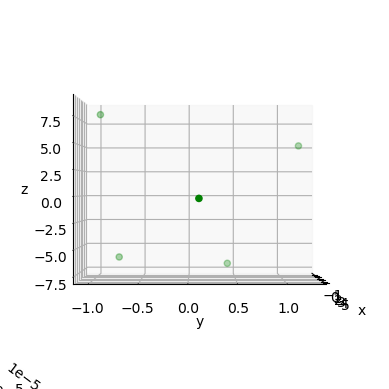

In [42]:
colors=[] #red ortho, green meta, blue para
for name in df.columns:
    if name[0]=='o':
        colors.append('red')
    elif name[0]=='m':
        colors.append('green')
    else:
        colors.append('blue')
figure1=plt.figure()
axes1=figure1.add_subplot(projection="3d")
axes1.scatter(df.iloc[0],df.iloc[1],df.iloc[2],marker="o",c=colors)
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_zlabel('z')
lst=[0,0,10]#cross section of yz
axes1.azim=lst[0]
axes1.elev=lst[1]
axes1.dist=lst[2]
plt.show()


✏️ Produce a plot of some less significant principal components, for example components 4, 5, and 6, to explore how succesfully these compoents are able to separate the three subsets of data. How does the separation vary as higher order principal components are explored?

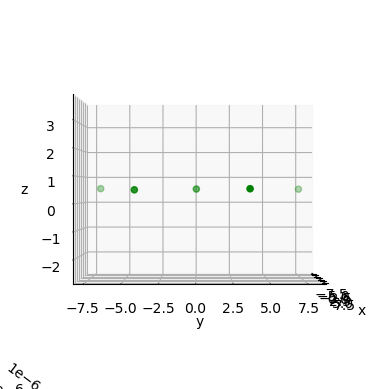

In [45]:
figure1=plt.figure()
axes1=figure1.add_subplot(projection="3d")
axes1.scatter(df.iloc[2],df.iloc[3],df.iloc[4],marker="o",c=colors)
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_zlabel('z')
lst=[0,0,10]#cross section of yz
axes1.azim=lst[0]
axes1.elev=lst[1]
axes1.dist=lst[2]
plt.show()


✏️ Write a function called `perform_pca()` which takes in a DataFrame (like the one produced with `load_spectra()`), and reduces it to `n` principal components (in addition to the DataFrame, you should be able to pass `n` to the function as a parameter). Add this new function to your C317 library.

In [46]:
def perform_pca(n,dataframe):
    PCA=sklearn.decomposition.PCA(n)
    x=PCA.fit_transform(dataframe.T)
    df=pd.DataFrame(data=x.T, columns=dataframe.columns)
    return df

✏️ Reload your updated C317 library (using the code below). Import the data as before and use your new function to carry out PCA indentifying 20 principal components. Confirm that this has been succesful by comparing the head of your previous 20 component DataFrame with the new one you have generated.

In [52]:
import importlib
importlib.reload(C317)
C317.perform_pca(5,C317.load_spectra())

,m-anisaldehyde_1,m-anisaldehyde_2,m-anisaldehyde_3,m-anisaldehyde_4,m-anisaldehyde_5
0,-1.532099e-05,-1.450744e-05,5.177986e-05,-1.033199e-05,-1.161944e-05
1,1.230798e-05,4.296331e-06,1.115381e-06,-9.901733e-06,-7.817959e-06
2,5.180536e-06,-7.027486e-06,-1.877408e-07,8.375672e-06,-6.340982e-06
3,-4.239717e-06,7.654344e-06,2.671136e-08,3.665123e-06,-7.106462e-06
4,3.228143e-19,3.228143e-19,3.228143e-19,3.228143e-19,3.228143e-19


✏️ Within your C317 library, update your `load_spectra()` function to accept a new parameter `n`. Alter your function so that if `n` is greater than 0, the `load_spectra()` function will apply the `perform_pca()` function, outputting the first `n` principal components of the dataset. If `n` is set to 0, the original spectral data should be imported.
<br>
<br>**Note:** Since `load_spectra()` will now make use of the `perform_pca()` function, you will need to make sure that `perform_pca()` is defined above `load_spectra()` in your updated C317 library.

✏️ Once again, test your updated C317 library by using the modified `load_spectra()` function to generate a 20-principal-component DataFrame from the library of IR spectra. In addition, check that passing a value of `n = 0` to the function returns a DataFrame of the original spectral data.

In [12]:
import importlib
importlib.reload(C317)
C317.load_spectra(20,1).head()

,m-toluenesulfonyl chloride,m-toluenesulfonyl chloride,m-toluenesulfonyl chloride,m-toluenesulfonyl chloride,m-toluenesulfonyl chloride,m-toluicacid,m-toluicacid,m-toluicacid,m-toluicacid,m-toluicacid,...,p-(trifluoromethyl)acetophenone,p-(trifluoromethyl)acetophenone,p-(trifluoromethyl)acetophenone,p-(trifluoromethyl)acetophenone,p-(trifluoromethyl)acetophenone,p-(trifluoromethyl)benzaldehyde,p-(trifluoromethyl)benzaldehyde,p-(trifluoromethyl)benzaldehyde,p-(trifluoromethyl)benzaldehyde,p-(trifluoromethyl)benzaldehyde
0,-0.000552,-0.000544,-0.000542,-0.000545,-0.000557,-0.000210,-0.000218,-0.000355,-0.000251,-0.000176,...,-0.000911,-0.000929,-0.000967,-0.000940,-0.000957,-0.000942,-0.000947,-0.000943,-0.000947,-0.000939
1,0.000622,0.000620,0.000621,0.000620,0.000608,-0.000156,-0.000168,-0.000085,-0.000154,-0.000162,...,0.000209,0.000211,0.000193,0.000208,0.000205,0.000078,0.000079,0.000077,0.000078,0.000079
2,0.000277,0.000277,0.000277,0.000278,0.000274,-0.000326,-0.000337,-0.000220,-0.000322,-0.000327,...,0.000410,0.000419,0.000417,0.000427,0.000425,-0.000028,-0.000028,-0.000028,-0.000028,-0.000026
3,0.000710,0.000698,0.000698,0.000699,0.000699,0.000293,0.000312,0.000321,0.000314,0.000273,...,-0.000336,-0.000338,-0.000333,-0.000334,-0.000332,-0.000408,-0.000405,-0.000406,-0.000404,-0.000406
4,-0.000043,-0.000044,-0.000044,-0.000043,-0.000043,-0.000233,-0.000238,-0.000188,-0.000233,-0.000238,...,-0.000232,-0.000238,-0.000239,-0.000245,-0.000245,-0.000190,-0.000190,-0.000188,-0.000189,-0.000190


---